In [129]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

database = "zelda.sqlite"
con = sqlite3.connect(database)

In [130]:
# Which staff member worked on the most games?

In [131]:
task1_sql = """
SELECT name, count(*) AS amount 
FROM staff
JOIN game_staff ON staff.id = game_staff.staff_id
GROUP BY name
ORDER BY amount DESC
LIMIT 5
"""

In [132]:
task1_result = pd.read_sql_query(task1_sql, con)
print(task1_result)

               name  amount
0  Shigeru Miyamoto      22
1    Takashi Tezuka      20
2     Yoichi Yamada      16
3       Eiji Aonuma      15
4     Yusuke Nakano       9


<Axes: xlabel='name', ylabel='amount'>

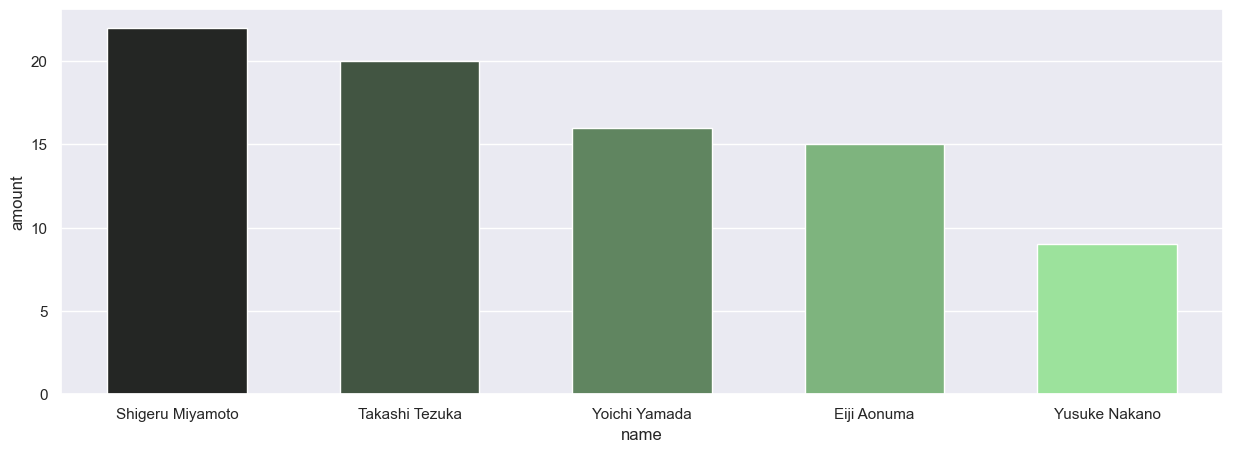

In [133]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.set_style("darkgrid")
sns.barplot(x = task1_result.name, y = task1_result.amount, hue = task1_result.name, palette = "dark:lightgreen", width = 0.6, legend = False)

In [134]:
# List the monster that appear in at least 3 games

In [135]:
task2_sql = """
SELECT name, count(*) AS amount
FROM monster JOIN game_monster 
ON monster.id = game_monster.monster_id
GROUP BY name
HAVING count(*) >= 3
ORDER BY amount DESC
LIMIT 5
"""

In [136]:
task2_result = pd.read_sql_query(task2_sql, con)
print(task2_result)

      name  amount
0     Fire      19
1  Octorok      18
2    Keese      18
3  Stalfos      17
4    Armos      17


<Axes: xlabel='name', ylabel='amount'>

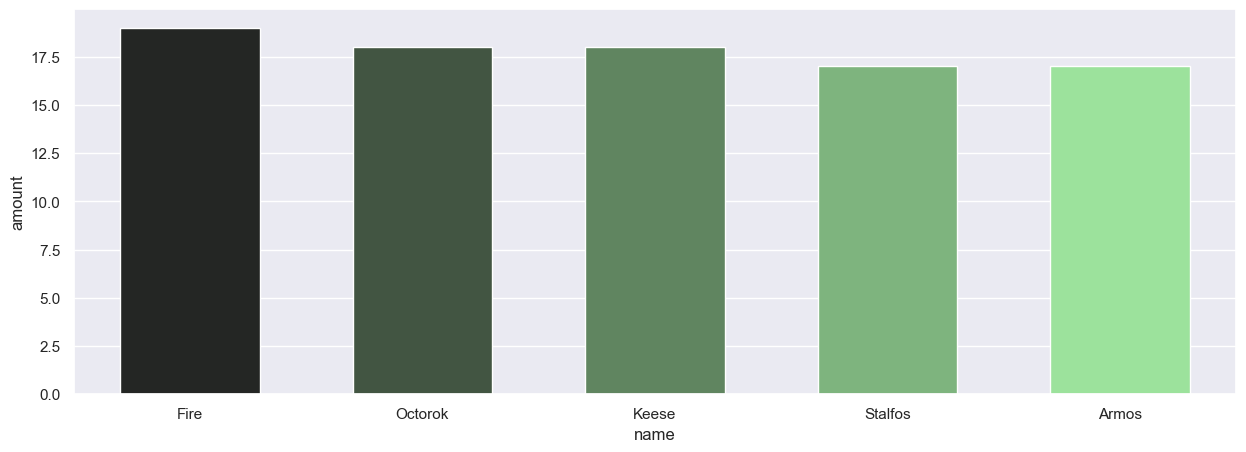

In [147]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.set_style("darkgrid")
sns.barplot(x = task2_result.name, y = task2_result.amount, hue = task2_result.name, palette = "dark:lightgreen", width = 0.6, legend = False)

In [148]:
# List items with their descriptions ordered by the number of games in which they appeared,
# starting with the highest number of games.

In [163]:
task3_sql = """
SELECT name, description, count(*) AS amount
FROM item
JOIN game_item 
ON item.id = game_item.item_id 
GROUP BY name, description 
ORDER BY amount DESC
LIMIT 8
"""

In [164]:
task3_result = pd.read_sql_query(task3_sql, con)
print(task3_result)

              name                                        description  amount
0             Link  Link is the name shared by the main protagonis...      38
1            Ganon  Ganon, also known by his original/human form G...      26
2            Fairy  Fairies are a recurring race of creatures in T...      19
3        Small Key  Small Keys, also known simply as Keys, are rec...      19
4            Heart  Hearts also known as Recovery Hearts, are recu...      18
5  Heart Container  Heart Containers, also known as Bowls of Heart...      18
6    Map of Hyrule  Maps of Hyrule are recurring Items in The Lege...      18
7              Map  Maps are recurring Items in The Legend of Zeld...      17


<Axes: xlabel='name', ylabel='amount'>

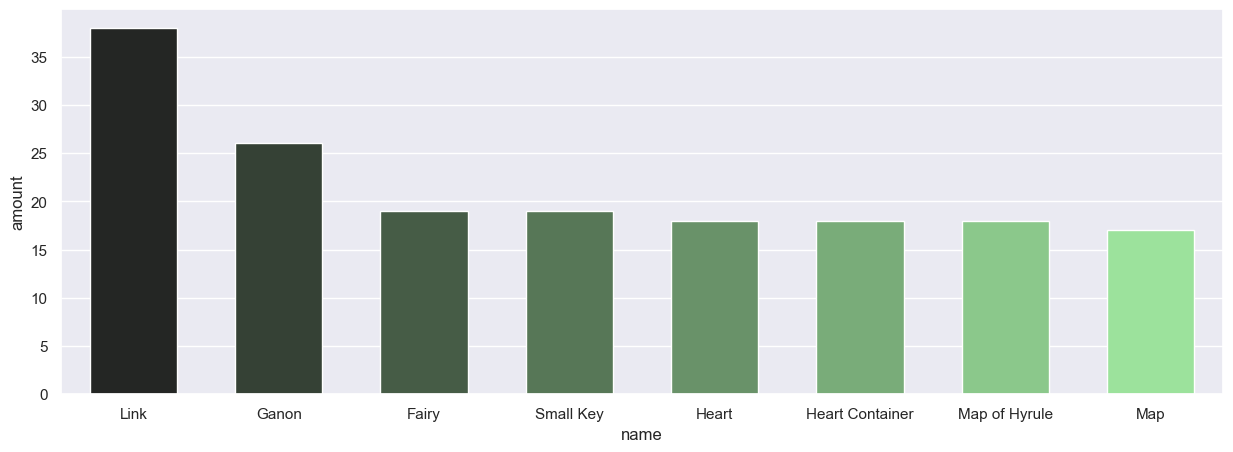

In [165]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.set_style("darkgrid")
sns.barplot(x = task3_result.name, y = task3_result.amount, hue = task3_result.name, palette = "dark:lightgreen", width = 0.6, legend = False)

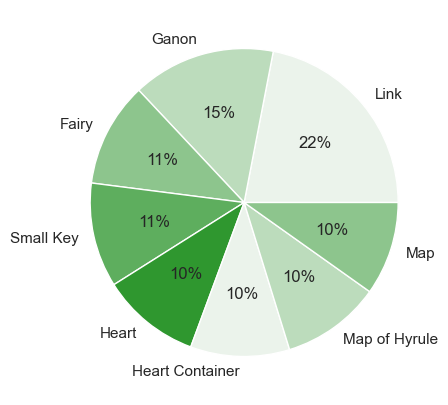

In [166]:
colors = sns.color_palette('light:green')[0:5]
data = task3_result.amount
labels = task3_result.name
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()